In [5]:
!pip install PyDrive
!pip install gensim
!pip install pyldavis
!python -m spacy download en

gax-google-logging-v2 0.8.3 has requirement google-gax<0.13.0,>=0.12.5, but you'll have google-gax 0.15.16 which is incompatible.
pyrebase 3.0.27 has requirement oauth2client==3.0.0, but you'll have oauth2client 4.1.3 which is incompatible.
pyrebase 3.0.27 has requirement requests==2.11.1, but you'll have requests 2.21.0 which is incompatible.
gax-google-pubsub-v1 0.8.3 has requirement google-gax<0.13.0,>=0.12.5, but you'll have google-gax 0.15.16 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
gax-google-logging-v2 0.8.3 has requirement google-gax<0.13.0,>=0.12.5, but you'll have google-gax 0.15.16 which is incompatible.
pyrebase 3.0.27 has requirement oauth2client==3.0.0, but you'll have oauth2client 4.1.3 which is incompatible.
pyrebase 3.0.27 has requirement requests==2.11.1, but you'll have requests 2.21.0 which is incompatible.
gax-google-pubsub-v1 0.8.3 has re

gax-google-logging-v2 0.8.3 has requirement google-gax<0.13.0,>=0.12.5, but you'll have google-gax 0.15.16 which is incompatible.
pyrebase 3.0.27 has requirement oauth2client==3.0.0, but you'll have oauth2client 4.1.3 which is incompatible.
pyrebase 3.0.27 has requirement requests==2.11.1, but you'll have requests 2.21.0 which is incompatible.
gax-google-pubsub-v1 0.8.3 has requirement google-gax<0.13.0,>=0.12.5, but you'll have google-gax 0.15.16 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Traceback (most recent call last):
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 163, in _run_module_as_main
    mod_name, _Error)
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 111, in _get_module_details
    __import__(mod_name)  # Do not catch exc

In [90]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google import auth
from oauth2client.client import GoogleCredentials
import nltk
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import re
# nltk.download('stopwords')

In [16]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

AttributeError: module 'google.auth' has no attribute 'authenticate_user'

In [0]:
# download = drive.CreateFile({'id': '1-a2dbUDDHsmkWOXoDYvgvCa8WBkEMzbr'})

In [18]:
ls

MoreCheckTM.ipynb    data.json
auto_review.dict     topicmodeling.ipynb


In [0]:
# download.GetContentFile('automotive_rev_json.gz')

In [37]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import json
import re
import gzip
# import spacy

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)
    
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [39]:
# df = getDF('automotive_rev_json.gz')
df = pd.read_json('data.json')
df.shape

(15, 4)

In [40]:
df.head()

,id,location,name,reviews
0,wKKRoSg1pZQtQRYPoD7TXg,"{'address2': 'Ste 500', 'address3': '', 'zip_code': '30309', 'state': 'GA', 'city': 'Atlanta', 'address1': '903 Peachtree St', 'display_address': ['903 Peachtree St', 'Ste 500', 'Atlanta, GA 30309...",t-mobile-atlanta-13,"[[Was in town for work and had issues with my phone and service. This T-mobile is one of the earliest one to open; and they're right at midtown, so I went in right at 9am. The customer service rep..."
1,8hXzJzOb3K1eFor0oNrPWA,"{'address2': 'Ste 105', 'address3': '', 'zip_code': '30305', 'state': 'GA', 'city': 'Atlanta', 'address1': '2900 Peachtree Rd NW', 'display_address': ['2900 Peachtree Rd NW', 'Ste 105', 'Atlanta, ...",t-mobile-atlanta-3,"[[The customer service is off the charts!!! The staff went above and beyond to help!!! I had a great experience!!!, 5.0, \n 3/2/2019\n ], [Where are the workers? Why am I having to wait ..."
2,z-ldpf_9VxZjITfBb7Lnkg,"{'address2': 'Ste 100', 'address3': None, 'zip_code': '30346', 'state': 'GA', 'city': 'Atlanta', 'address1': '1161 Hammond Dr', 'display_address': ['1161 Hammond Dr', 'Ste 100', 'Atlanta, GA 30346...",t-mobile-atlanta-39,"[[If you haven't been to see us in over a year then come and check out our newly remodeled store and wonderful new staff., 5.0, \n 11/24/2018\n ], [""We can't help you because it gives us..."
3,qiAckHMVZQScy2U9nvSCmQ,"{'address2': 'Ste 480', 'address3': '', 'zip_code': '30106', 'state': 'GA', 'city': 'Austell', 'address1': '1757 E West Connector', 'display_address': ['1757 E West Connector', 'Ste 480', 'Austell...",t-mobile-austell,"[[Kudos to Tatiana! My daughter need a screen cover for her IPhone and we were treated as if we were buying a new $1,000 phone. Super nice and very hospitable. Thanks!, 5.0, \n 10/18/2018\..."
4,9oHGS1knSS3uAHsf2sqxRg,"{'address2': 'Ste 13', 'address3': None, 'zip_code': '30047', 'state': 'GA', 'city': 'Lilburn', 'address1': '4145 Lawrenceville Hwy NW', 'display_address': ['4145 Lawrenceville Hwy NW', 'Ste 13', ...",t-mobile-lilburn-2,[[I would like to start by saying I was pleasantly surprised and extremely satisfied with the level of customer service I received along with the professionalism displayed at this location. Let's...


In [41]:
all_reviews = []
for i in range(len(df)):
    for j in range(len(df.loc[i]['reviews'])):
        all_reviews.append(df.loc[i]['reviews'][j][0])

In [42]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


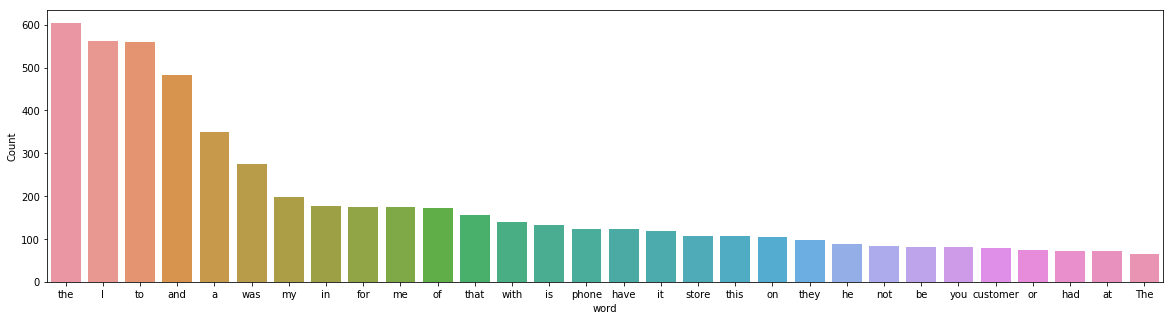

In [43]:
# freq_words(df['reviewText'])
freq_words(all_reviews)

In [96]:
# replace "n't" with " not"
all_reviews = [rev.replace("n\'t", " not") for rev in all_reviews]

punctuation = re.compile(r'[-.?!,":;()\'|0-9]')
# remove unwanted characters, numbers and symbols
all_reviews = [rev.replace("[^a-zA-Z#]", " ") for rev in all_reviews ]

all_reviews = [punctuation.sub("", rev) for rev in all_reviews ]

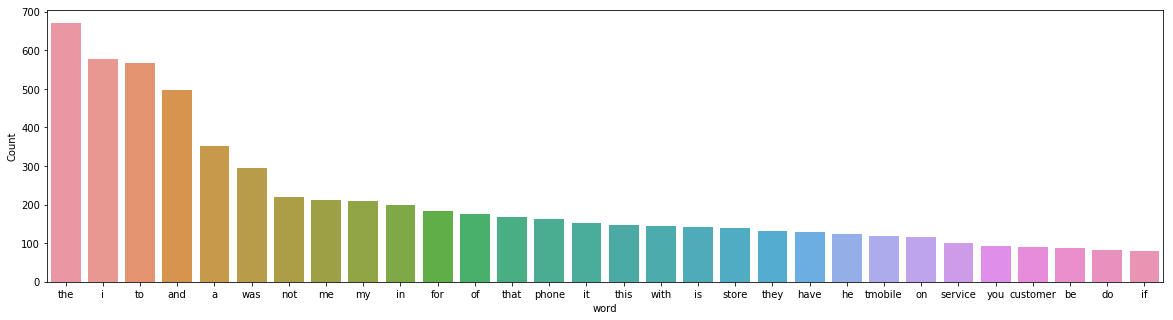

In [97]:
freq_words(all_reviews)

In [98]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [99]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words and len(i) > 2])
    return rev_new

In [100]:
remove_stopwords("This cat".split())

'This cat'

In [101]:
# make entire text lowercase
all_reviews = [r.lower() for r in all_reviews]

# remove short words (length < 3)
all_reviews = [rev for rev in all_reviews if len(rev) > 2]

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in all_reviews]


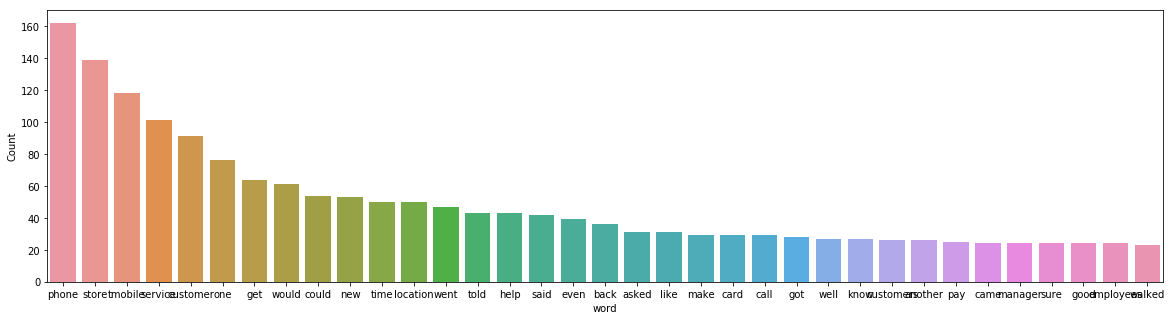

In [102]:
freq_words(reviews, 35)

In [164]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

def lemmatization(texts, tags=['JJ', 'JJR', 'JJS']):
    output = []
    for sent in texts:
        spec_sent = []
        for word in sent:
            pos = nltk.pos_tag([word])[0][1]
            if pos in tags:
                spec_sent.append(punctuation.sub("",lemmatizer.lemmatize(word)))
        output.append(spec_sent)
#         print(lemmatizer.lemmatize(sent))
#         output.append(lemmatizer.lemmatize(sent))
#         doc = nlp(" ".join(sent)) 
#         output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [165]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['came', 'upgrade', 'two', 'months', 'ago', 'really', 'anyone', 'quiet', 'place', 'well', 'organized', 'associates', 'helpful', 'upgrade', 'process', 'although', 'bit', 'trouble', 'trying', 'get', 'new', 'device', '#teammagenta', 'answer', 'questions', 'may', 'ill', 'going', 'upgrades']


In [166]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['came', 'upgrade', 'two', 'months', 'ago', 'really', 'anyone', 'quiet', 'place', 'well', 'organized', 'associates', 'helpful', 'upgrade', 'process', 'although', 'bit', 'trouble', 'trying', 'get', 'new', 'device', '#teammagenta', 'answer', 'questions', 'may', 'ill', 'going', 'upgrades']


29

In [167]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

['quiet', 'new']


In [168]:
print(reviews_2[1])
len(reviews_2[1])

['quiet', 'new']


2

In [169]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'#teammagenta',
 'ago',
 'although',
 'answer',
 'anyone',
 'associates',
 'bit',
 'came',
 'device',
 'get',
 'going',
 'helpful',
 'ill',
 'may',
 'months',
 'organized',
 'place',
 'process',
 'questions',
 'really',
 'trouble',
 'trying',
 'two',
 'upgrade',
 'upgrades',
 'well'}

In [170]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
new_reviews = reviews_3

122


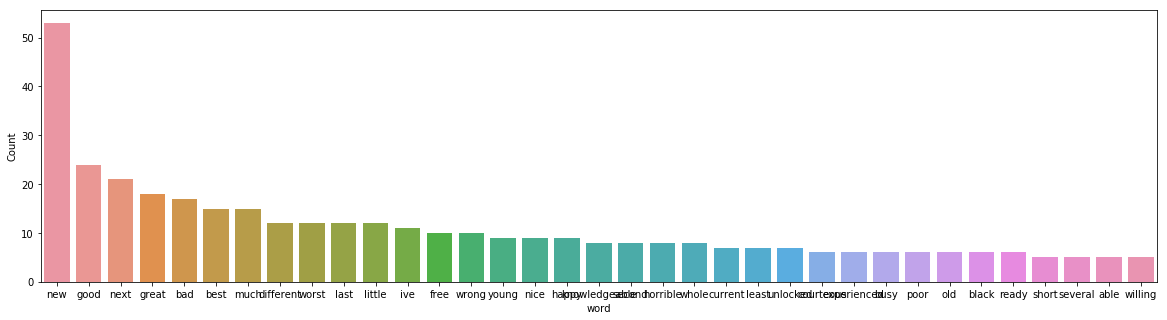

In [171]:
print(len(new_reviews))
freq_words(new_reviews, 35)

In [172]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

In [173]:
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [174]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [175]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=15, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [176]:
lda_model.print_topics()[0]

(0,
 '0.099*"different" + 0.040*"free" + 0.040*"able" + 0.040*"second" + 0.040*"wrong" + 0.040*"nice" + 0.040*"good" + 0.021*"private" + 0.021*"short" + 0.021*"international"')

In [177]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.101022  0.015666       1        1  13.036777
3      0.028659 -0.146035       2        1   9.977703
13     0.052778  0.109271       3        1   8.528358
12     0.058741 -0.034573       4        1   8.190413
14    -0.165246 -0.033042       5        1   7.731670
8     -0.004467  0.016480       6        1   7.725821
5     -0.102736 -0.083867       7        1   7.626657
4      0.047654 -0.001142       8        1   6.377567
7      0.204558 -0.023053       9        1   6.099244
0      0.067242 -0.078950      10        1   5.925030
2     -0.074228  0.193239      11        1   5.365081
11    -0.073158 -0.052682      12        1   4.055345
6     -0.106421 -0.015401      13        1   3.898385
1     -0.055932 -0.011695      14        1   2.977473
10     0.021534  0.145785      15        1   2.484478, topic_info=    Category       Freq           Term      Total  loglift  logprob
1    Default  14.000000          great  14.000000  30.0000  30.0000
32   Default   9.000000          worst   9.000000  29.0000  29.0000
4    Default  42.000000            new  42.000000  28.0000  28.0000
18   Default  17.000000           next  17.000000  27.0000  27.0000
25   Default  14.000000            bad  14.000000  26.0000  26.0000
11   Default   4.000000      courteous   4.000000  25.0000  25.0000
183  Default   5.000000       unlocked   5.000000  24.0000  24.0000
12   Default  10.000000      different  10.000000  23.0000  23.0000
46   Default   7.000000          happy   7.000000  22.0000  22.0000
77   Default  10.000000         little  10.000000  21.0000  21.0000
92   Default   8.000000          wrong   8.000000  20.0000  20.0000
59   Default  12.000000           much  12.000000  19.0000  19.0000
50   Default  10.000000           last  10.000000  18.0000  18.0000
17   Default   8.000000           free   8.000000  17.0000  17.0000
20   Default   6.000000        current   6.000000  16.0000  16.0000
56   Default   6.000000          whole   6.000000  15.0000  15.0000
35   Default   5.000000           poor   5.000000  14.0000  14.0000
28   Default   9.000000            ive   9.000000  13.0000  13.0000
26   Default   6.000000       horrible   6.000000  12.0000  12.0000
57   Default  12.000000           best  12.000000  11.0000  11.0000
159  Default   4.000000        willing   4.000000  10.0000  10.0000
33   Default   5.000000           busy   5.000000   9.0000   9.0000
47   Default   7.000000           nice   7.000000   8.0000   8.0000
87   Default   2.000000         retail   2.000000   7.0000   7.0000
126  Default   3.000000      satisfied   3.000000   6.0000   6.0000
38   Default   3.000000            big   3.000000   5.0000   5.0000
67   Default   4.000000           able   4.000000   4.0000   4.0000
43   Default   5.000000            old   5.000000   3.0000   3.0000
51   Default   6.000000          least   6.000000   2.0000   2.0000
110  Default   3.000000     interested   3.000000   1.0000   1.0000
..       ...        ...            ...        ...      ...      ...
125  Topic15   0.042747   enthusiastic   1.502642   0.1354  -5.8999
78   Topic15   0.042747         entire   1.502644   0.1354  -5.8999
76   Topic15   0.042747    inattentive   1.502644   0.1354  -5.8999
182  Topic15   0.042747        smaller   1.502645   0.1354  -5.8999
131  Topic15   0.042747          fresh   1.504911   0.1339  -5.8999
184  Topic15   0.042747      hilarious   1.504913   0.1339  -5.8999
180  Topic15   0.042747       quickest   1.504915   0.1339  -5.8999
53   Topic15   0.042747      sensitive   1.504916   0.1339  -5.8999
48   Topic15   0.042747         higher   1.504916   0.1339  -5.8999
52   Topic15   0.042747     productive   1.504916   0.1339  -5.8999
147  Topic15   0.042747          upper   1.596405   0.0749  -5.8999
146  Topic15   0.042747        overall   3.772099  -0.7850  -5.8999
145  Topic15   0.042747          extra   1.5964

In [0]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

In [144]:
[rev for rev in all_reviews if "new" in rev and "worst" in rev]

['worst tmobile store ever horrible service bad attitudes whether you call or go in these people just ca not seem to get it right i do not know why the guys here seem to be so bitter and angry but ive always had bad experiences here each year i try to give them a second chance and each year they #fail tmobile prides themselves in having awesome service thats why my family has stuck with them for well over a decade so to go into a store or call into a store and get \xa0bad attitudes just leaves a bad taste in my mouth and they just never seem to have enough employees to handle the amount of customers there will literally be one associate juggling or not juggling  people if the person is unable to multitask you could literally be standing in queue for + minutes there is a caveat though if one of their friends or if certain customers come in theyll drop everything in attend to them unless its president obama or first lady michelle or maybe oprah then attend to customers in the order they 